# Explore Data Analysis

In [3]:
import numpy as np
import pandas as pd
import datetime
import random
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")                                                      


In [ ]:
import os
os.getcwd()

In [ ]:
os.chdir('/Users/danny/Desktop/MDS/master 4/CITS 5553 Data Science Capstone Project/Individual/Capstone-Individual/Data')

## Weather Underground Data

In [4]:
df = pd.read_csv('aemo_wu_merged.csv', index_col = 0)
df.head()

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair
3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,0.0,29.0,0.0,Fair
4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,0.0,29.0,0.0,Fair


In [ ]:
df = df.rename(columns={'Temperature':'temperature(celcius)', 'Dew Point':'dew_point(celcius)', 'Humidity':'humidity(%)', 'Wind Speed':'wind_speed(mph)',
       'Wind Gust':'wind_gush(mph)', 'Pressure':'pressure(in)', 'Precip.':'precip.(in)'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97504 entries, 0 to 97503
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                97504 non-null  object 
 1   Operational Demand (MW)  97504 non-null  float64
 2   temperature(celcius)     97504 non-null  float64
 3   dew_point(celcius)       97504 non-null  float64
 4   humidity(%)              97504 non-null  float64
 5   Wind                     97504 non-null  object 
 6   wind_speed(mph)          97504 non-null  float64
 7   wind_gush(mph)           97504 non-null  float64
 8   pressure(in)             97504 non-null  float64
 9   precip.(in)              97504 non-null  float64
 10  Condition                97504 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.9+ MB


In [6]:
df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.0
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,0.911634,29.332540,0.0
std,403.227198,6.504368,4.280321,21.330864,5.149548,5.521146,0.471126,0.0
min,761.204000,1.100000,-15.000000,5.000000,0.000000,0.000000,29.000000,0.0
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,0.000000,29.000000,0.0
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,0.000000,29.000000,0.0
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,0.000000,30.000000,0.0
max,3979.836000,42.800000,22.800000,100.000000,37.000000,58.000000,30.000000,0.0


In [7]:
# Seperate timestamp and set several new variables
def wind_ans(x):
    if x > 0: 
        return 1 
    else:
        return 0
# split time into date and interval timedf['Date'] = pd.to_datetime(df['Date'])
df[['Date','Trading Interval Time']] = df['timestamp'].str.split(" ",expand=True)
df['Date'] = pd.to_datetime(df['Date'])
df['new_timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['year'] = df['new_timestamp'].dt.year
df['month'] = df['new_timestamp'].dt.month
df['day'] = df['new_timestamp'].dt.day
df['hour'] = df['new_timestamp'].dt.hour
df['minute'] = df['new_timestamp'].dt.minute
df['Day_of_week'] = df['new_timestamp'].dt.dayofweek
df['Day_of_month'] = df['new_timestamp'].dt.day
df['Day_of_year'] = df['new_timestamp'].dt.dayofyear
df['has_Wind'] = df['wind_speed(mph)'].apply(wind_ans) 
df.set_index('timestamp', inplace=True, drop=True)
df.reset_index(inplace=True)
df.head()

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),...,new_timestamp,year,month,day,hour,minute,Day_of_week,Day_of_month,Day_of_year,has_Wind
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,...,2017-01-22 00:00:00,2017,1,22,0,0,6,22,22,1
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,...,2017-01-22 00:30:00,2017,1,22,0,30,6,22,22,1
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,...,2017-01-22 01:00:00,2017,1,22,1,0,6,22,22,1
3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,0.0,29.0,0.0,...,2017-01-22 01:30:00,2017,1,22,1,30,6,22,22,1
4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,0.0,29.0,0.0,...,2017-01-22 02:00:00,2017,1,22,2,0,6,22,22,1


## Correlation hotmap

In [8]:
corr = df.corr()
corr

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),year,month,day,hour,minute,Day_of_week,Day_of_month,Day_of_year,has_Wind
Operational Demand (MW),1.000000,0.196843,0.121277,-0.067923,0.044680,-0.018715,-0.095511,NaN,1.767428e-02,-1.597865e-01,-1.384855e-02,4.500611e-01,-2.128365e-03,-1.454706e-01,-1.384855e-02,-1.604844e-01,0.038568
temperature(celcius),0.196843,1.000000,0.307910,-0.771656,0.397263,-0.010542,-0.468408,NaN,1.798175e-01,-2.296745e-01,2.862851e-05,2.313580e-01,-1.103755e-04,4.721231e-04,2.862851e-05,-2.274799e-01,0.186248
dew_point(celcius),0.121277,0.307910,1.000000,0.304610,0.035015,-0.039337,-0.446545,NaN,2.077197e-01,-2.364257e-01,1.028890e-02,5.789315e-02,3.606118e-04,-1.153716e-02,1.028890e-02,-2.344319e-01,0.057026
humidity(%),-0.067923,-0.771656,0.304610,1.000000,-0.439327,-0.027854,0.163130,NaN,-6.982877e-02,7.979314e-02,9.842478e-03,-2.064445e-01,3.437775e-04,-5.865162e-03,9.842478e-03,7.922244e-02,-0.181811
wind_speed(mph),0.044680,0.397263,0.035015,-0.439327,1.000000,0.325810,-0.293212,NaN,8.609661e-02,-3.889776e-02,-1.268889e-02,1.058549e-01,-1.005778e-03,-1.082767e-02,-1.268889e-02,-3.888899e-02,0.305788
wind_gush(mph),-0.018715,-0.010542,-0.039337,-0.027854,0.325810,1.000000,-0.067798,NaN,-1.126201e-02,3.940341e-03,-1.727431e-02,-3.004143e-02,7.274335e-03,-4.286976e-03,-1.727431e-02,2.704297e-03,0.023557
pressure(in),-0.095511,-0.468408,-0.446545,0.163130,-0.293212,-0.067798,1.000000,NaN,-1.514338e-01,1.011638e-01,-1.122454e-02,-1.222809e-02,7.401536e-04,2.205489e-02,-1.122454e-02,9.851691e-02,-0.109329
precip.(in),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.017674,0.179818,0.207720,-0.069829,0.086097,-0.011262,-0.151434,NaN,1.000000e+00,-1.459498e-01,-1.941559e-02,-3.091031e-04,4.924740e-17,1.408660e-03,-1.941559e-02,-1.466009e-01,-0.009977
month,-0.159787,-0.229675,-0.236426,0.079793,-0.038898,0.003940,0.101164,NaN,-1.459498e-01,1.000000e+00,-5.846022e-04,-9.370644e-05,1.868350e-20,1.626092e-03,-5.846022e-04,9.963389e-01,-0.003749


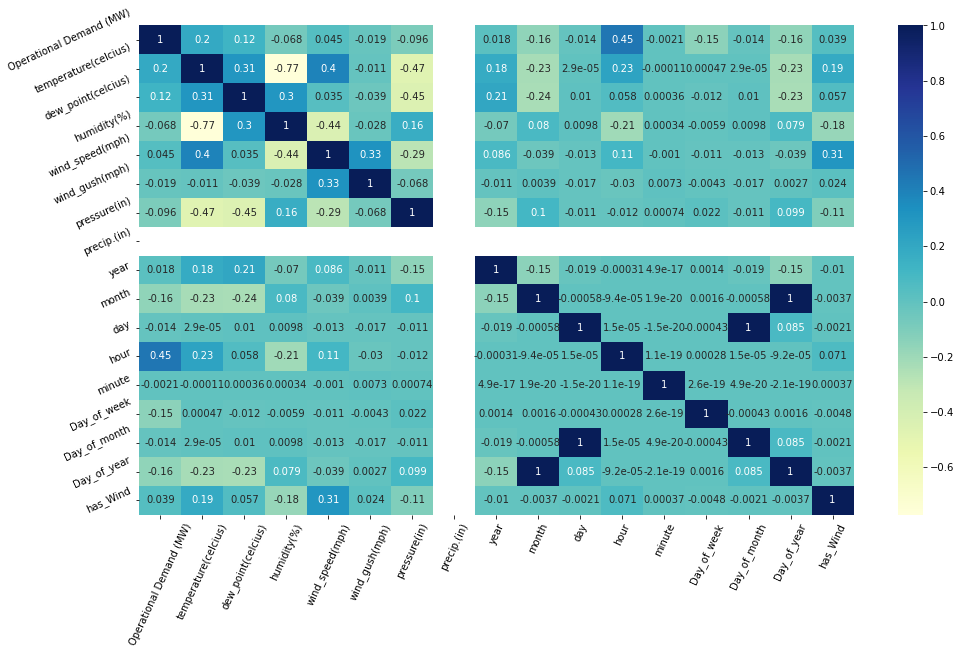

In [9]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.xticks(rotation=65)
plt.yticks(rotation=25)
plt.show()

In [10]:
pd.options.display.notebook_repr_html= False
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')

## Long Term

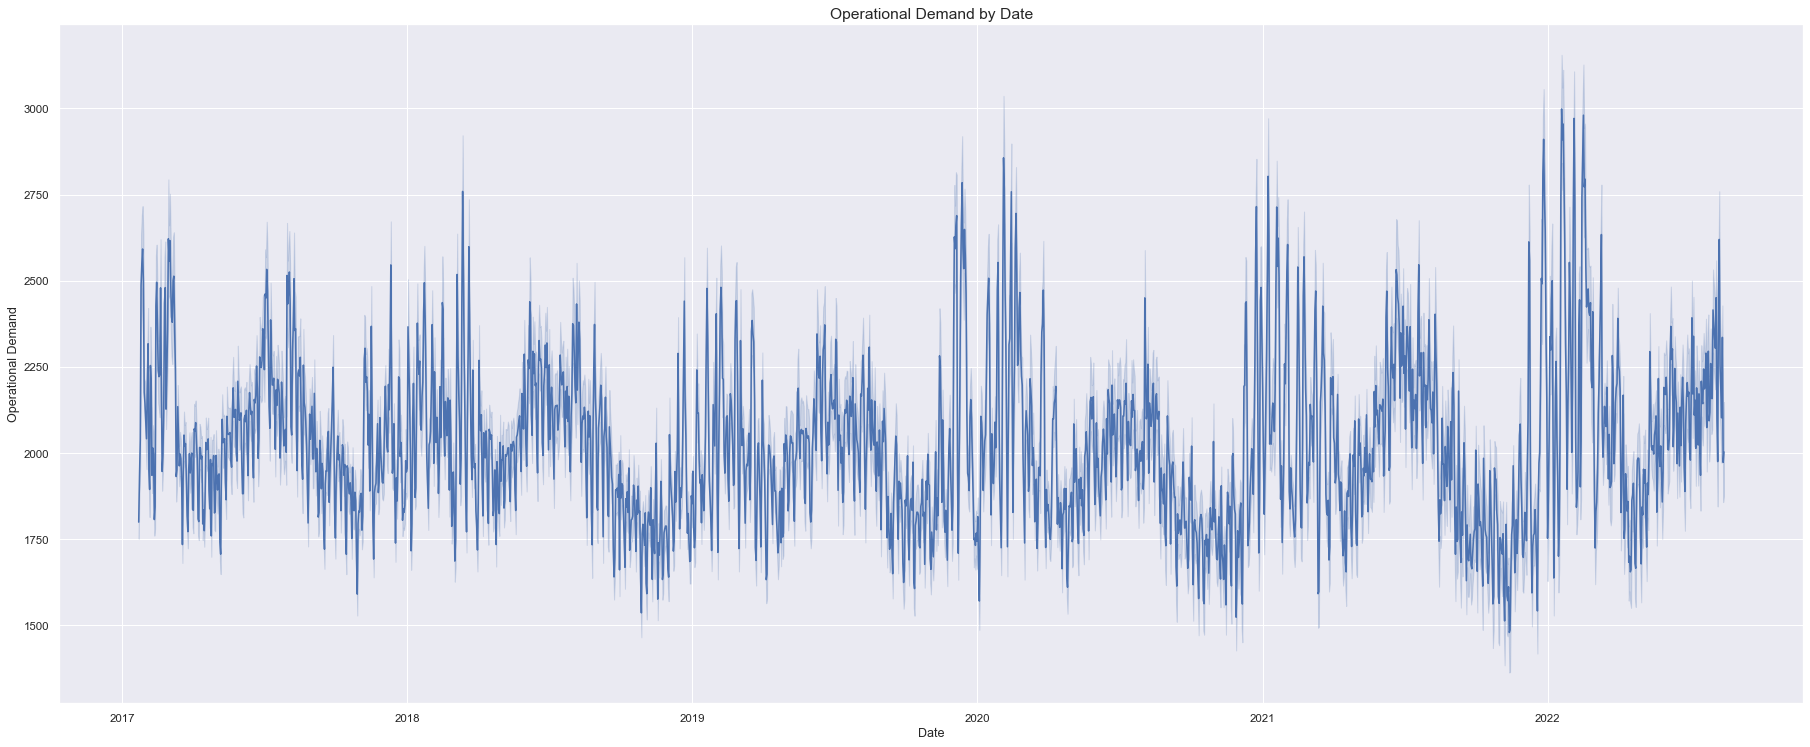

In [11]:
s=pd.DataFrame(dict(y=df['Operational Demand (MW)'],x=df['Date']))
plt.figure(figsize=(30,12))
sns.lineplot(data=s,x= 'x',y='y')
plt.xlabel('Date')
plt.ylabel('Operational Demand')
plt.title("Operational Demand by Date",fontsize = 15)
plt.show()

### per Month
To be more specific, we obtain the mean operational demand of each month and days

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='month,day'>

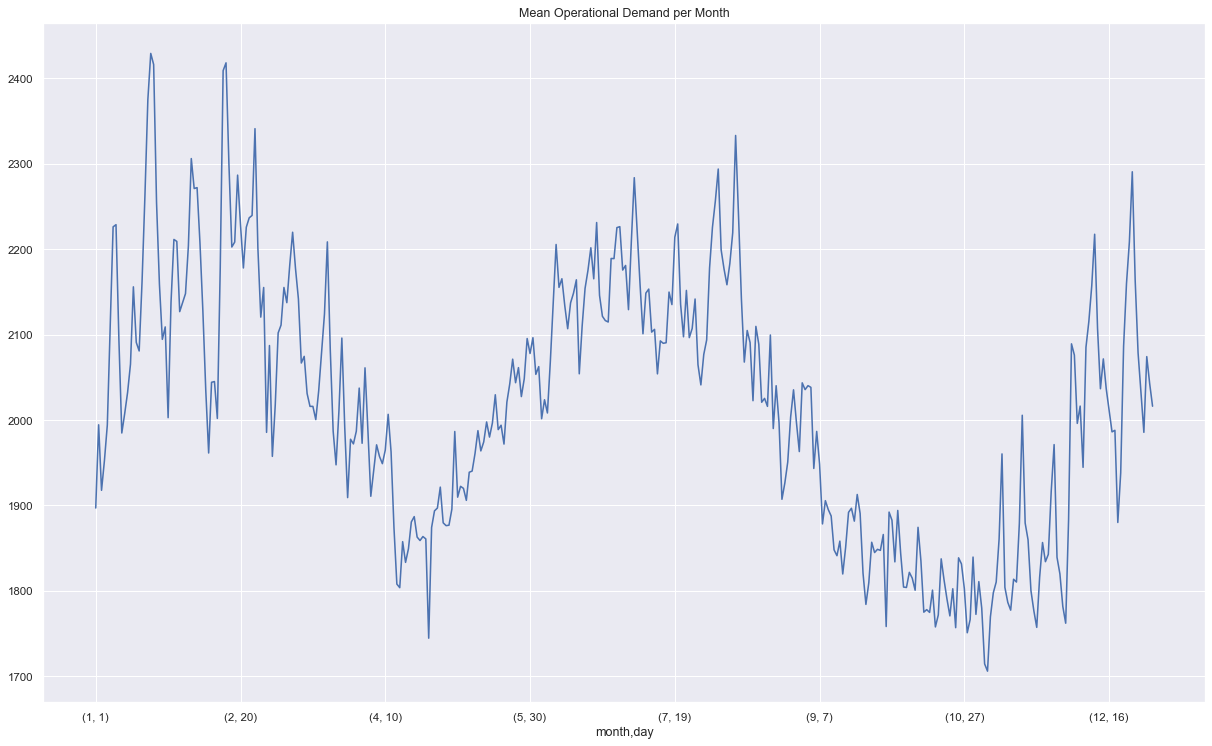

In [12]:
OD_mon_l=df.groupby([df["month"],df["day"]]).mean()['Operational Demand (MW)']
OD_mon_l.plot(title="Mean Operational Demand per Month",figsize=(20,12))

### per Day
Look at the data on a daily basis

<AxesSubplot:title={'center':'Mean Operational Demand per Day'}, xlabel='Trading Interval Time'>

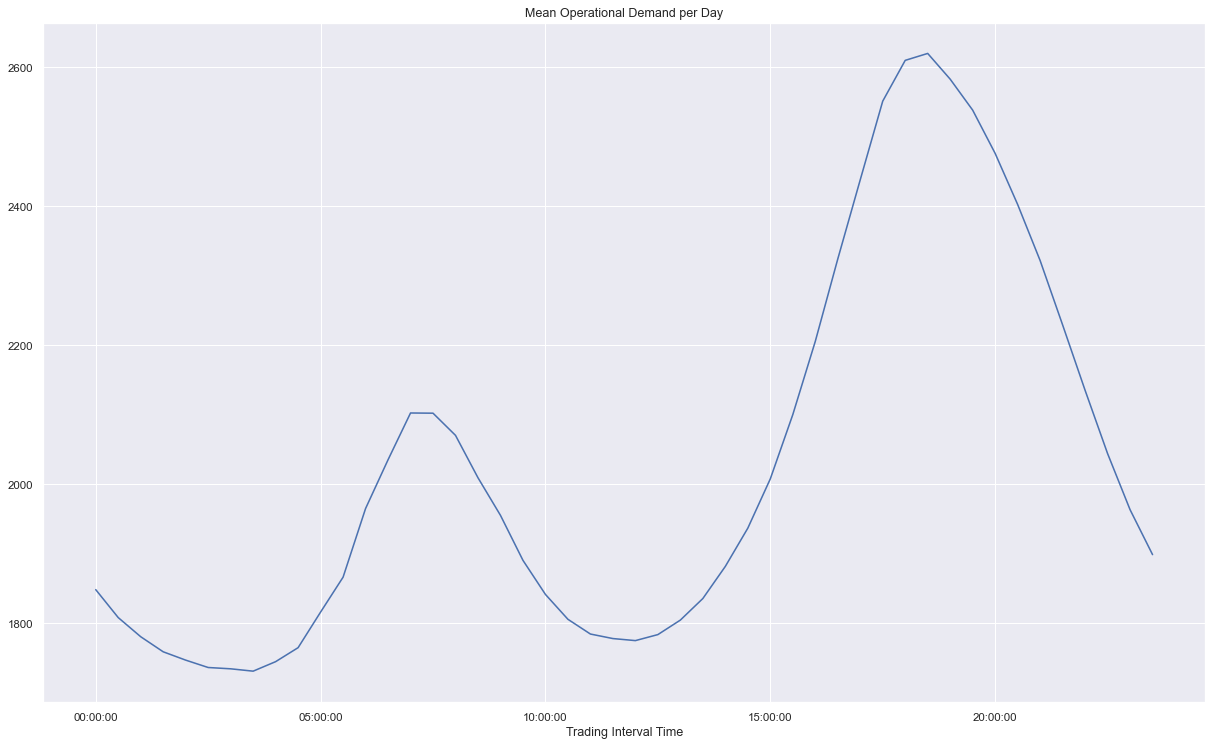

In [13]:
OD_day_l=df.groupby('Trading Interval Time').mean()['Operational Demand (MW)']
OD_day_l.plot(title="Mean Operational Demand per Day",figsize=(20,12))

## Short Term from Dec to Mar

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='year,month,day'>

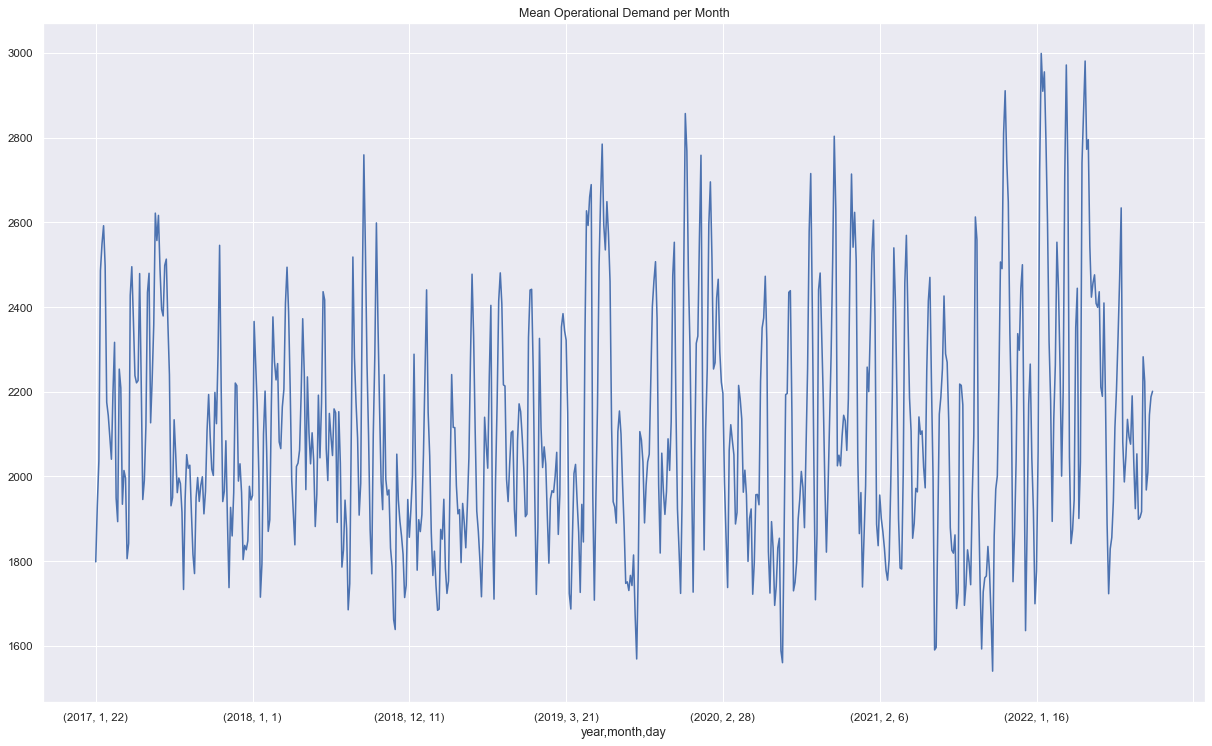

In [14]:
df_s = df[(df['month'] ==12 )|(df['month'] < 4)]
OD_mon_s=df_s.groupby([df_s["year"],df_s["month"],df_s["day"]]).mean()['Operational Demand (MW)']
OD_mon_s.plot(title="Mean Operational Demand per Month",figsize=(20,12)) 


## Facotrs

In [15]:
# Numeric factors
numeric = []
for i in df.columns:
    if df[i].dtype == 'float64':
        if i == 'Operational Demand (MW)':
            pass
        else:
            numeric.append(i)
numeric

['temperature(celcius)',
 'dew_point(celcius)',
 'humidity(%)',
 'wind_speed(mph)',
 'wind_gush(mph)',
 'pressure(in)',
 'precip.(in)']

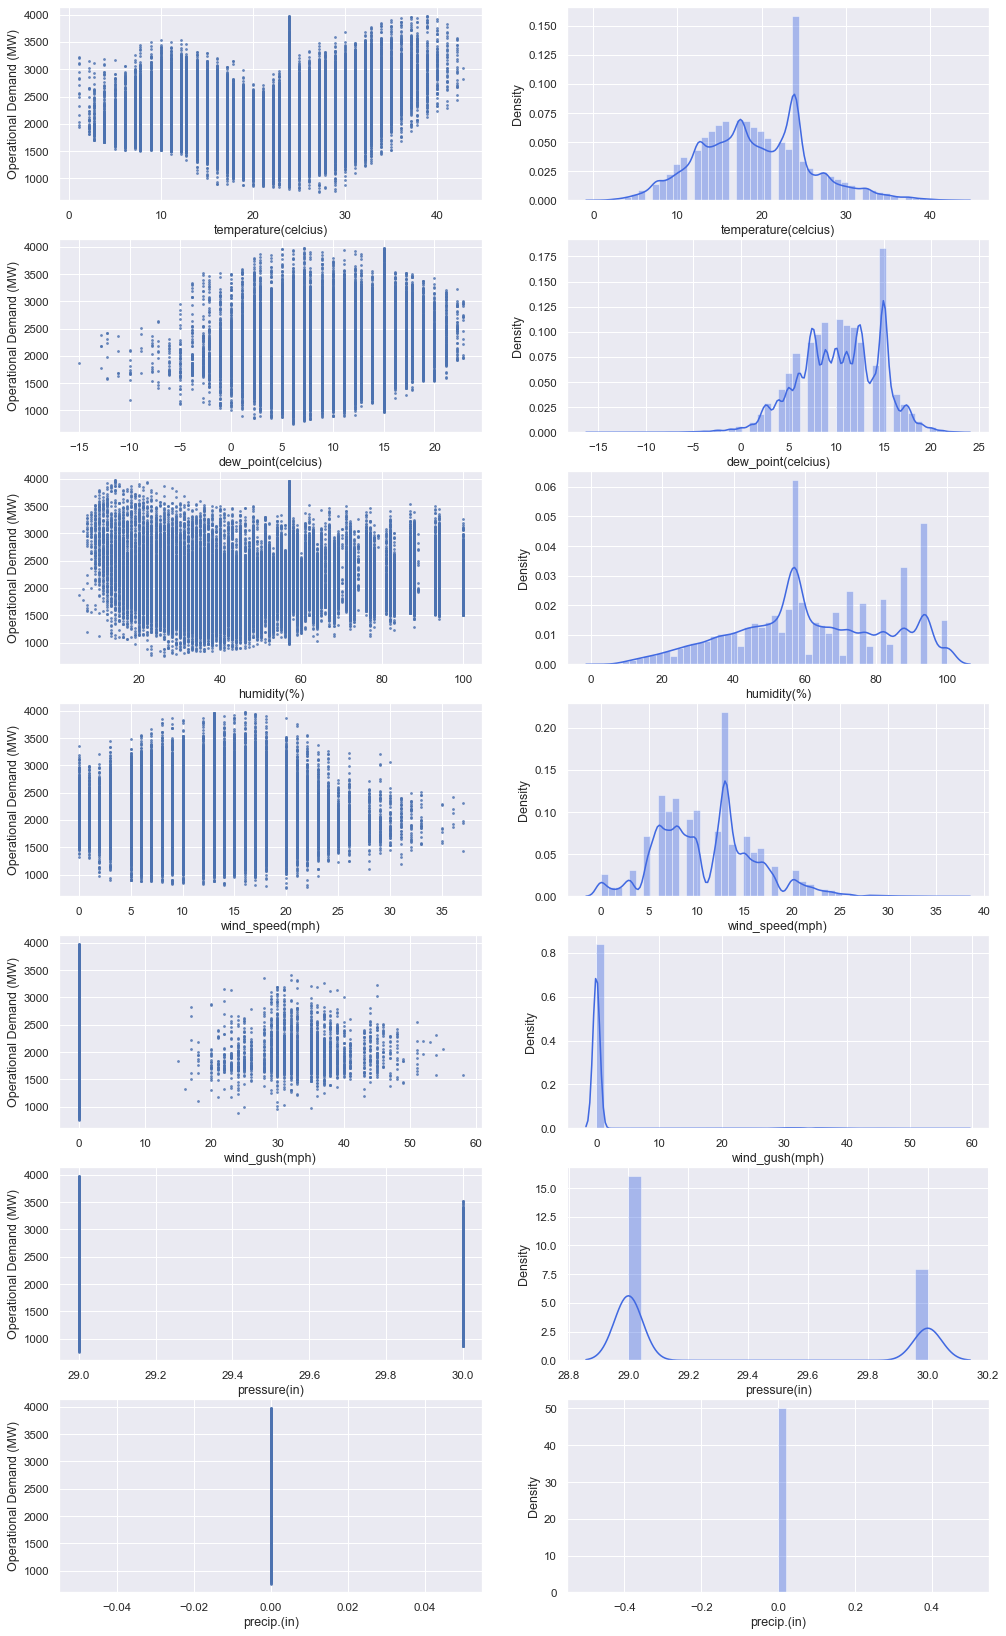

In [19]:
fig, ax = plt.subplots(len(numeric), 2, figsize=(16, len(numeric) * 4))

for n in range(len(numeric)):
    feat = numeric[n]
    ax[n, 0].scatter(df[feat].values, df['Operational Demand (MW)'].values, s=3, alpha = 0.7)
    ax[n, 0].set_ylabel("Operational Demand (MW)")
    ax[n, 0].set_xlabel(feat)

    # Distribution
    sns.distplot(df[feat].dropna(), ax=ax[n, 1], color="royalblue")

### Monthly Trend (temp,humid,wind_speed,dew_point)

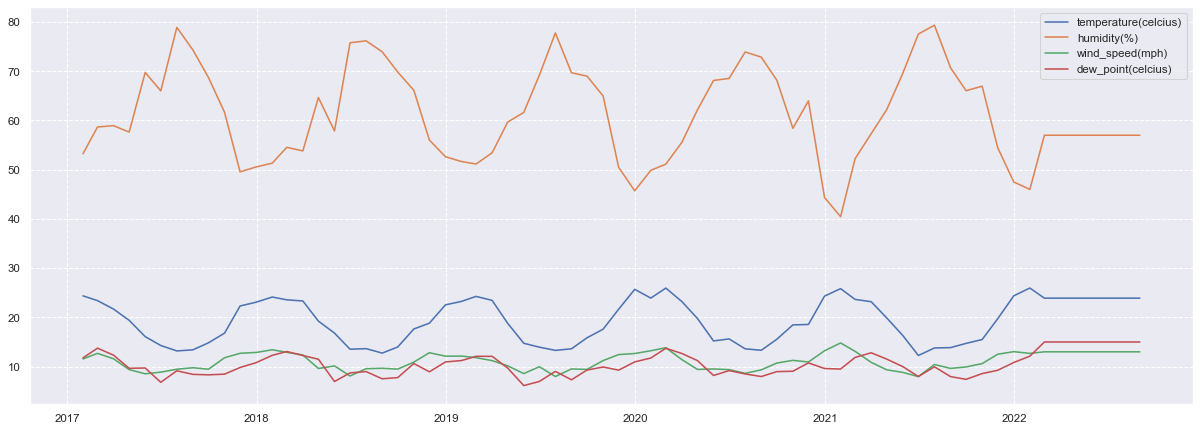

In [16]:
df.set_index('Date', inplace = True)
sub_m_df = df.resample('M')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_m_df.index,sub_m_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_m_df.index,sub_m_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_m_df.index,sub_m_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_m_df.index,sub_m_df["dew_point(celcius)"], label = "dew_point(celcius)")
# plt.plot(sub_m_df.index,sub_m_df["Operational Demand (MW)"], label = "Operational Demand (MW)")
plt.grid(linestyle = "--")
plt.legend()

### Weekly Trend (temp,humid,wind_speed,dew_point)

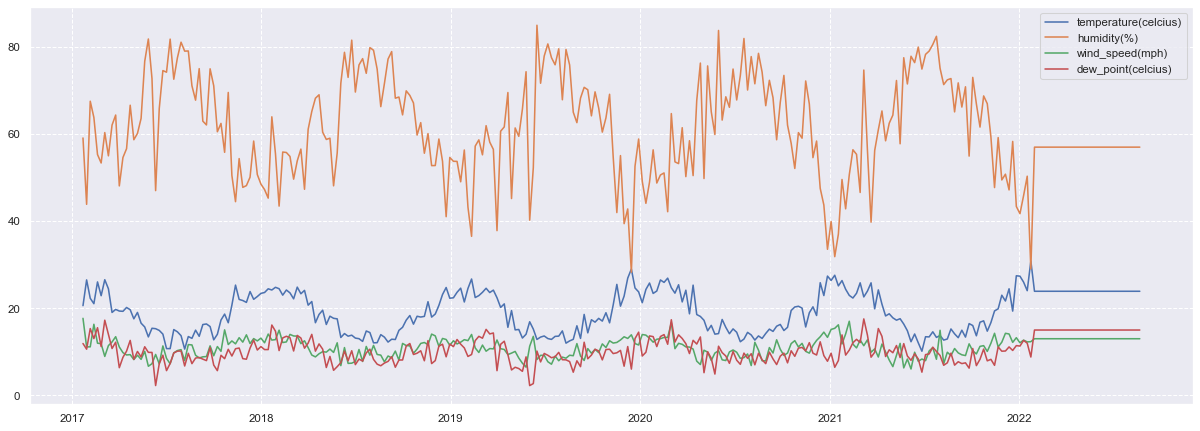

In [17]:
sub_w_df = df.resample('W')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_w_df.index,sub_w_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_w_df.index,sub_w_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_w_df.index,sub_w_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_w_df.index,sub_w_df["dew_point(celcius)"], label = "dew_point(celcius)")
plt.grid(linestyle = "--")
plt.legend()

For weekly, it is similar to the month trend, only it looks a little more tortuous. The trend of three variables,except temperature, are similar to monthly, and for temperature, higher value and total opposite trend with the other three vaiables. 

### Boxplot for wind

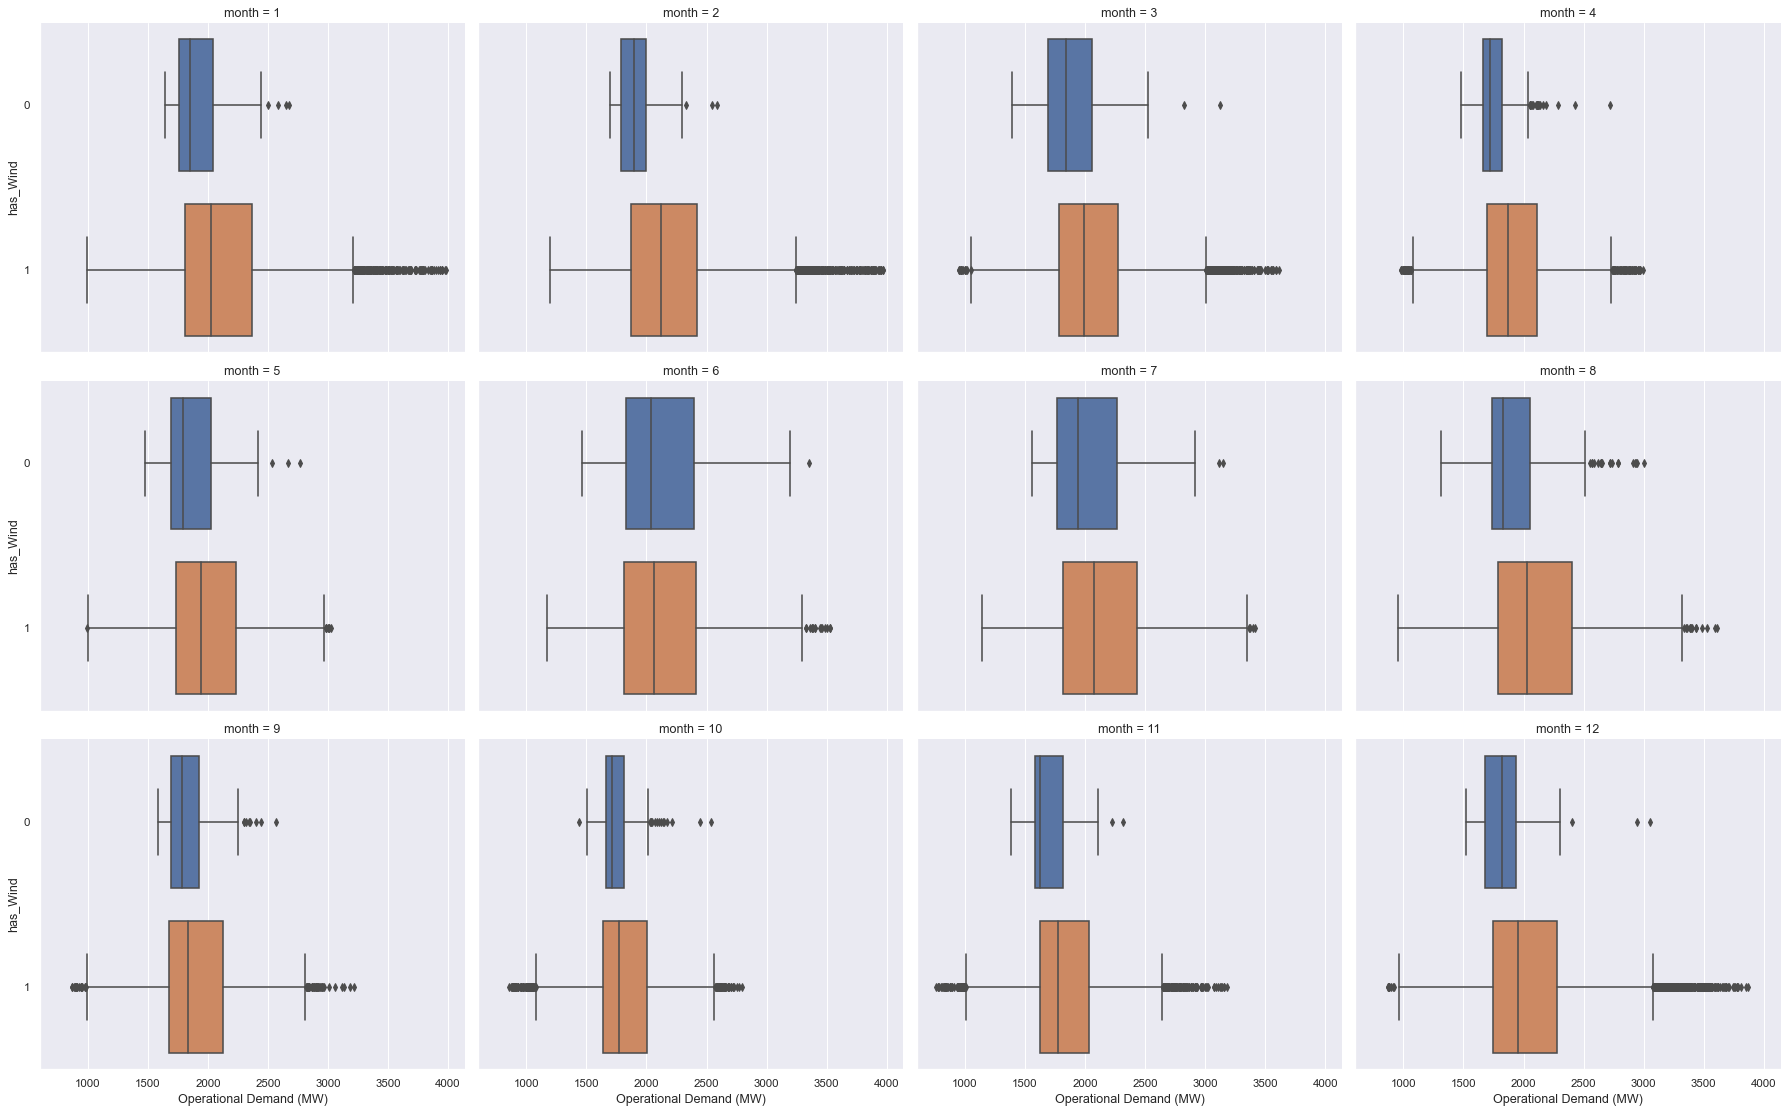

In [18]:
box_p = sns.catplot(kind = 'box', y= 'has_Wind', x = 'Operational Demand (MW)', data = df, col = 'month',
                orient="h", col_wrap= 4, aspect = 1.2)
box_p.set_xlabels("Operational Demand (MW)")